In [2]:
from sparse_causal_model_learner_rl.config import Config
from sparse_causal_model_learner_rl.sacred_gin_tune.sacred_wrapper import load_config_files
%matplotlib inline
import vectorincrement
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import gin
import pickle

In [3]:
ckpt = '/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_linear_with_lagrange_dual_sparsity/main_fcn_f42f2_00000_0_2021-03-23_23-20-20/checkpoint_40000/checkpoint'

In [48]:
l=pickle.load(open(ckpt, 'rb'))

2021-03-24 09:15:25,076	WARNING session.py:20 -- Session not detected. You should not be calling this function outside `tune.run` or while using the class API. 


Selecting name 15deb3ce-8c79-11eb-81af-90e2baa15164
Make environment SparseMatrix-v0 [<class 'encoder.observation_encoder.LinearMatrixEncoder'>] {}
(pid=1563) Make environment SparseMatrix-v0 [<class 'encoder.observation_encoder.LinearMatrixEncoder'>] {}


(pid=1554) Make environment SparseMatrix-v0 [<class 'encoder.observation_encoder.LinearMatrixEncoder'>] {}
(pid=1608) Make environment SparseMatrix-v0 [<class 'encoder.observation_encoder.LinearMatrixEncoder'>] {}


ERROR:root:Cannot collect data Use collect_and_get_context



[False]
[12, 1] 5
[False]
[5, 1] 5
[False]
[5, 1] 5


In [51]:
initd = l.lagrange_multipliers.initialized
initd[:] = [True] * len(initd)

In [52]:
from sparse_causal_model_learner_rl.loss.losses import lagrangian_granular, manual_switch_gradient, fit_loss_obs_space, sparsity_loss

In [53]:
ctx = l.collect_and_get_context()

In [54]:
fit_loss_obs_space

<function sparse_causal_model_learner_rl.loss.losses.fit_loss_obs_space(obs_x, obs_y, action_x, decoder, model, additional_feature_keys, reconstructor, model_forward_kwargs=None, fill_switch_grad=False, opt_label=None, add_fcons=True, obs_relative=False, rot_pre=None, rot_post=None, divide_by_std=False, detach_features=False, detach_rotation=False, loss_coeff=1.0, cross_std=True, loss_local_cache=None, **kwargs)>

In [55]:
lobj = fit_loss_obs_space(**ctx, fill_switch_grad=True, detach_features=True, detach_rotation=True, cross_std=False)
lobj

{'loss': tensor(0.1903, device='cuda:0', grad_fn=<MeanBackward1>),
 'losses': {'additional': 0.0,
  'obs': tensor(0.1903, device='cuda:0', grad_fn=<MeanBackward0>),
  'feat': tensor(0.0196, device='cuda:0', grad_fn=<MeanBackward0>),
  'feat_model': tensor(0.0677, device='cuda:0', grad_fn=<MeanBackward0>),
  'additional_orig': 0.0,
  'obs_orig': tensor(0.0976, device='cuda:0', grad_fn=<MeanBackward0>),
  'feat_orig': tensor(0.0196, device='cuda:0', grad_fn=<MeanBackward0>),
  'feat_model_orig': tensor(0.0669, device='cuda:0', grad_fn=<MeanBackward0>)},
 'metrics': {'mean_feature': array([ 0.06138425, -0.05739325,  0.16163892, -0.01324799,  0.01835594],
        dtype=float32),
  'std_feature': array([ 0.23151161, 16.281256  ,  5.6831784 ,  7.5402365 ,  3.0724635 ],
        dtype=float32),
  'min_feature': -54.590538024902344,
  'max_feature': 63.085838317871094,
  'loss_fcons': 0.019639939069747925,
  'loss_add': 0.0,
  'loss_rec': 0.09756901860237122,
  'loss_fcons_pre': 0.0668885260820

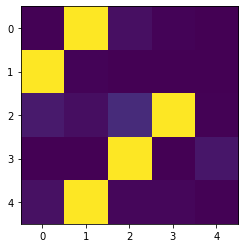

In [56]:
plt.imshow(l.graph[0])

In [57]:
lobj['loss'].backward()

In [128]:
l.model.model.switch.probas.grad

tensor([[  74.7702, -436.4554,  -12.9022,  -86.3075,   59.9908],
        [ -82.6938,    3.2597,  -80.1583,   98.9247, -136.3776],
        [ 108.3747,  109.2570,  -66.3407, -610.4317,   81.6529],
        [  39.4544,  -57.9812, -479.1976,  -78.0007,  112.0384],
        [ -20.4986,    8.1719,   75.7183,    6.3246,  117.2446],
        [  -4.2899,  135.3990,  -38.9700,  -36.2628,    5.2023]],
       device='cuda:0')

In [129]:
[opt.zero_grad() for opt in l.optimizer_objects.values()]

[None, None, None, None]

In [130]:
lobj = lagrangian_granular(**ctx, mode='PRIMAL')
lobj

{'loss': tensor(-1026.4417, device='cuda:0', grad_fn=<AddBackward0>),
 'metrics': {'fit': {'value': 0.17505010962486267,
   'coeff': 1.0,
   'mean_feature': array([ 0.06138425, -0.05739325,  0.16163892, -0.01324799,  0.01835594],
         dtype=float32),
   'std_feature': array([ 0.23151161, 16.281256  ,  5.6831784 ,  7.5402365 ,  3.0724635 ],
         dtype=float32),
   'min_feature': -54.590538024902344,
   'max_feature': 63.085838317871094,
   'loss_fcons': 0.01973091997206211,
   'loss_add': 0.0,
   'loss_rec': 0.09805087745189667,
   'loss_fcons_pre': 0.06675326824188232,
   'rec_fit_acc_loss_01_agg': 1.0519999265670776,
   'loss_discrete': tensor(-0.0095, device='cuda:0', grad_fn=<AddBackward0>)},
  'fit/additional': {'value': 0.0},
  'fit/obs': {'value': 0.17505010962486267},
  'fit/feat': {'value': 0.018690034747123718},
  'fit/feat_model': {'value': 0.06691928207874298},
  'fit/additional_orig': {'value': 0.0, 'coeff': 1.0},
  'fit/obs_orig': {'value': 0.09805087745189667, 'co

In [131]:
lobj['loss'].backward()

In [132]:
l.model.model.switch.probas.grad

tensor([[ -68.1307, -253.8876,  -69.9844,  -96.0038,   40.4841],
        [-124.6519,   -3.2031,   17.9399,  -49.7887, -232.5931],
        [  19.7261,   37.9972,  -14.1073, -557.4277,  -19.9672],
        [  -1.5351,  -25.2803, -418.3435,  -22.8634,  -56.4972],
        [ -91.4349,    9.0122,  -51.9004,    3.0027,   -8.3925],
        [ -44.4149,    4.6639,  -80.3570,   33.6051,  -11.9917]],
       device='cuda:0')